In [27]:
documents = []

ego_id = '40379006'

file = open('Textos para testes/egos/' + ego_id + '.txt', 'r', encoding='utf-8')
for line in file:
    documents.append(line)
file.close()
'''
file = open('Textos para testes/alters/' + ego_id + '.txt', 'r', encoding='utf-8')
for line in file:
    documents.append(line)
file.close()
print(len(documents))
'''

"\nfile = open('Textos para testes/alters/' + ego_id + '.txt', 'r', encoding='utf-8')\nfor line in file:\n    documents.append(line)\nfile.close()\nprint(len(documents))\n"

In [28]:
documents1 = []
j = 0
for t in documents:
    if not t in documents1:
        documents1.append(t)
    else:
        j+=1
        #print(t)
print('Numero de textos repetidos: ' + str(j))

Numero de textos repetidos: 1


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000 # max number of uniq words

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [30]:
from sklearn.decomposition import LatentDirichletAllocation

no_topics = 10
learning_decay = .7
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0,learning_decay = learning_decay).fit(tf)

In [31]:
import numpy as np
import pandas as pd

# Show top n keywords for each topic
def show_topics(vectorizer=tf_vectorizer, lda_model=lda, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=tf_vectorizer, lda_model=lda, n_words=12)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11
Topic 0,best,follow,290785069,2169125545,think,things,friends,stay,live,73402979,13,fact
Topic 1,build,happy,use,failure,house,43848857,love,think,act,end,little,true
Topic 2,build,fear,130681675,word,end,say,use,knowledge,laugh,strength,18786414,listen
Topic 3,jesus,really,mean,word,54121703,sin,73402979,say,respect,world,live,work
Topic 4,make,god,like,matter,day,291890040,real,feel,way,life,say,action
Topic 5,dress,721941922990821376,check,mind,number,voice,beautiful,god,teach,say,181378896,thing
Topic 6,beauty,come,dream,new,plan,2837045940,room,step,old,75370824,forget,church
Topic 7,want,life,time,help,43848857,371467724,plan,strength,guy,live,dig,make
Topic 8,look,people,love,good,know,make,say,wrong,10,181378896,flaw,right
Topic 9,god,don,love,wait,18786414,person,know,mistake,trust,surprise,man,men


In [32]:
# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(np.round(lda.components_, 2))

# Assign Column and Index
df_topic_keywords.columns = tf_vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

# Vie
#list_frames = []
for t, row in df_topic_keywords.iterrows():
    aux = row.nlargest(12)
    #list_frames.append(aux.to_frame().T)
    print(t)
    a = ''
    for word, weight in aux.items():
        a += ' ' + word + ' (' + str(weight) + ') |'
    print(a)
    print('\n')

#list_frames[1]    

Topic0
 best (4.24) | follow (2.52) | 290785069 (2.5) | 2169125545 (1.81) | think (1.78) | things (1.45) | friends (1.41) | stay (1.4) | live (1.07) | 73402979 (1.05) | 13 (1.03) | 10 (1.02) |


Topic1
 build (4.37) | happy (3.5) | use (2.54) | failure (2.53) | house (2.5) | 43848857 (2.47) | love (1.84) | think (1.78) | act (1.39) | end (1.35) | little (1.34) | 721941922990821376 (1.33) |


Topic2
 build (2.97) | 130681675 (2.89) | fear (2.89) | word (2.87) | end (2.83) | say (2.61) | use (2.54) | knowledge (2.53) | laugh (2.53) | strength (2.53) | 18786414 (2.52) | listen (2.51) |


Topic3
 jesus (2.2) | really (1.84) | mean (1.76) | 54121703 (1.42) | word (1.42) | sin (1.39) | 73402979 (1.37) | say (1.35) | respect (1.34) | world (1.34) | live (1.32) | work (1.01) |


Topic4
 make (12.4) | god (8.94) | like (8.57) | matter (8.22) | day (7.61) | 291890040 (6.29) | real (5.34) | feel (5.05) | way (3.7) | life (3.39) | say (3.17) | action (2.97) |


Topic5
 dress (1.41) | 7219419229908

In [33]:
# Create Document - Topic Matrix
lda_output = lda.transform(tf)

# index names
docnames = [str(i) for i in range(len(documents))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 6), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
   color = 'green' if val > .1 else 'black'
   return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
style = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
style

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
0,0.699973,0.033336,0.033339,0.033336,0.033335,0.033337,0.033336,0.033337,0.033335,0.033335,0
1,0.014292,0.014287,0.871409,0.014287,0.014291,0.014287,0.014287,0.014288,0.014286,0.014286,2
2,0.025002,0.025007,0.025002,0.025002,0.025001,0.025002,0.025002,0.025003,0.774977,0.025002,8
3,0.010001,0.010001,0.010001,0.010001,0.010005,0.010001,0.010001,0.909986,0.010001,0.010004,7
4,0.025002,0.025005,0.025002,0.025002,0.025008,0.774971,0.025002,0.025001,0.025005,0.025002,5
5,0.016668,0.016672,0.016668,0.01667,0.016669,0.016671,0.016669,0.016668,0.849962,0.016683,8
6,0.549969,0.050002,0.050002,0.050002,0.050001,0.050002,0.050001,0.050005,0.050015,0.050001,0
7,0.871408,0.014288,0.014287,0.014287,0.014289,0.014287,0.014287,0.014293,0.014287,0.014288,0
8,0.025003,0.77498,0.025002,0.025002,0.025003,0.025002,0.025002,0.025001,0.025002,0.025002,1
9,0.016683,0.016668,0.016667,0.016668,0.016671,0.016668,0.016669,0.01667,0.016667,0.849968,9


In [34]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,4,57
1,8,53
2,7,42
3,9,39
4,0,30
5,2,19
6,6,17
7,1,13
8,3,12
9,5,3


In [35]:
#Documents of topic that classified most documents (First on the table above)

dominant_topic = df_document_topic['dominant_topic']

topic = df_topic_distribution['Topic Num'][0]

test_text = []
j = 0
for i, doc in enumerate(dominant_topic):
    if doc == topic:
        j+=1
        print('- ' + documents[i] + '  ')
        test_text.append(documents[i])

- 2247566484 DURING DIFFICULT TIME PLACE HOPE GOD ALONE HE GET GOOD BAD TIME YOU FORGET 
  
- 1526677688 I WALK FAITH EVEN I CANNOT SEE 2 CORINTHIANS 5 7 
  
- 147587110 TIME GET FUNNY WAY TICK 
  
- 233887730 IF ACCEPT GOD ASK TROUBLE FORGE AHEAD WITHOUT PROMISE PROTECTION 
  
- 181378896 TRUST REAL THING SERIOUS SEE BABY CUTE COLTON MAKE FEVER SPIKE 
  
- 34374292 GET FRIENDS MAKE 
  
- 73402979 YOU CERTAINLY CARRY GOD PURPOSE HOWEVER ACT MAKE DIFFERENCE WHETHER SERVE LIKE JUDAS LIKE JOHN 
  
- 721941922990821376 POPS BACK DAY 
  
- 293200939 SUCH AMAZING BAPTISMAL SERVICE TONIGHT GOD MOVE 
  
- 26270913 COULDN SAY BETTER 
  
- 293200939 JOIN RLC YOUTH TONIGHT 7PM 
  
- 232418772 AT FIRST FUNNY NOW TERRIFY 
  
- 114685387 TELL SOMEONE MATTER 
  
- 55712033 TO UNMARRIED DATE FRIENDS GUY GODLY LEADER TREAT LIKE TREASURE STOP WASTE TIME TEAR 
  
- 18040486 GOD MERCIES NEW EVERY MORNING TODAY DAY ONE 
  
- 338395294 IT TUESDAY ALREADY THINK SHARE STITCH FIX LOOK DAY WEEK CHANCE 250 
  
-

In [26]:
#Vectorize transform
text = tf_vectorizer.transform(test_text)

#LDA Transform
topic_probability_scores = lda.transform(text)

for i, doc in enumerate(topic_probability_scores):
    if not np.argmax(doc) == 1:
        print ('Document ' + str(i) + ':')
        print(np.argmax(doc))
        print(test_text[i])
        print(doc)

Document 0:
0
216444984 ARE CHEER PERFORMANCE TIGHTROPE FT 

[0.73099422 0.08642851 0.08914008 0.09343719]
Document 1:
0
2169125545 

[0.62029661 0.1259378  0.12763405 0.12613153]
Document 2:
0
251844312 MY GRADUATION WALK I BLESS FAITH FAMILY FRIENDS WOULDN POSSIBLE WITHOUT EVERYONE HELP 

[0.88850274 0.03799927 0.03677453 0.03672345]
Document 3:
0
189660705 LIGHT FIRE INSIDE YOU SEED ALMIGHTY GOD DON ALLOW SOMETHING SMALL KEEP GOD BEST 

[0.86349331 0.044646   0.04801089 0.0438498 ]
Document 4:
0
AUGUSTINE 

[0.25 0.25 0.25 0.25]
Document 5:
0
19223156 LEADERS GOAL SHUT BACKGROUND NOISE LISTEN VOICE CHALLENGE STRETCH INSPIRE GROW 

[0.86762497 0.04325869 0.04627913 0.0428372 ]
Document 6:
0
233887730 LEADERSHIP PRIVILEGE 

[0.61607076 0.12678585 0.12657974 0.13056365]
Document 7:
0
374209360 THE RIGHTEOUSNESS COME GOD FAITH PHIL 3 9 

[0.84420646 0.05155467 0.05210718 0.05213169]
Document 8:
0
73402979 WHATEVER HE MAKE GOOD BUT GOOD HE PREPARE OBEY 

[0.84615908 0.05070107 0.05088338

In [36]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += "   ".join([feature_names[i].replace('aa','@')
                            for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)
    print()

no_top_words = 12
display_topics(lda, tf_feature_names, no_top_words)

Topic #0: best   follow   290785069   2169125545   think   things   friends   stay   live   73402979   13   fact
Topic #1: build   happy   use   failure   house   43848857   love   think   act   end   little   true
Topic #2: build   fear   130681675   word   end   say   use   knowledge   laugh   strength   18786414   listen
Topic #3: jesus   really   mean   word   54121703   sin   73402979   say   respect   world   live   work
Topic #4: make   god   like   matter   day   291890040   real   feel   way   life   say   action
Topic #5: dress   721941922990821376   check   mind   number   voice   beautiful   god   teach   say   181378896   thing
Topic #6: beauty   come   dream   new   plan   2837045940   room   step   old   75370824   forget   church
Topic #7: want   life   time   help   43848857   371467724   plan   strength   guy   live   dig   make
Topic #8: look   people   love   good   know   make   say   wrong   10   181378896   flaw   right
Topic #9: god   don   love   wait   1878641

In [110]:
file = open('Textos para testes/egos/' + ego_id + '.txt', 'r', encoding='utf-8')
fonte = file.readlines()

autor = '1582853809'
for i in fonte:
    if autor in i:
        print(i)

1582853809 AT SEGREGATE DRINK FOUNTAIN MOBILE ALABAMA 1956 PHOTOGRAPH GORDON PARKS 

1582853809 MARILYN MONROE SIGN AUTOGRAPH FAN SET SOME LIKE IT HOT 1959 PHOTOGRAPH RICHARD MILLER 

1582853809 MUHAMMAD ALI TRAIN 1974 PHOTOGRAPH KEN REGAN 

1582853809 THE FIRST KNOW PHOTOGRAPH PRESIDENTIAL INAUGURATION PRESIDENT JAMES BUCHANAN MARCH 1857 

1582853809 A MUSLIM WOMAN COVER YELLOW STAR JEWISH NEIGHBOR VEIL PROTECT SARAJEVO 1941 

1582853809 A DAREDEVIL BALANCE BACK LEGS CHAIR ATOP FURNITURE 20 STORIES NEW YORK CIRCA 1920 PHOTO 

1582853809 CZESLAWA KWOKA AGE 14 AUSCHWITZ PRISONER IDENTITY PHOTO DECEMBER 1942 PHOTOGRAPH WILHELM BRASSE 

1582853809 SENATOR HIRAM RHODES REVELS FIRST AFRICAN AMERICAN SIT US SENATE CIRCA 1870 PHOTOGRAPH MATHEW BRADY 

1582853809 PHOTO BOOTH SELF PORTRAIT NORMA JEANE BAKER SOON HOLLYWOOD ICON MARILYN MONROE CIRCA 1940 

1582853809 FORMER UNITED STATES SECRETARY STATE COLIN POWELL SELFIES 60 YEARS FACEBOOK FOLKS 

1582853809 EIGHTEEN YEAR OLD INVENTOR H DAY WEA

In [15]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
panel

c:\users\pc-dell\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3       47.172672 -362.084503       1        1  34.244754
2      276.189331 -292.695801       2        1  23.883294
0      -22.217518 -133.068283       3        1  22.262701
1      206.799118  -63.679634       4        1  19.609250, topic_info=     Category       Freq        Term      Total  loglift  logprob
term                                                             
37    Default  33.000000   954590804  33.000000  30.0000  30.0000
32    Default  18.000000   568825492  18.000000  29.0000  29.0000
348   Default  16.000000       trump  16.000000  28.0000  28.0000
268   Default   7.000000   president   7.000000  27.0000  27.0000
201   Default  12.000000        like  12.000000  26.0000  26.0000
338   Default   8.000000       thank   8.000000  25.0000  25.0000
25    Default  15.000000    25073877  15.000000  24.0000  24.0000
193   Default   4.000000        lake   4.000000  23.0000  23.0000
381   Default   6.000000       world   6.000000  22.0000  22.0000
156   Default   5.000000       great   5.000000  21.0000  21.0000
11    Default   7.000000  1582853809   7.000000  20.0000  20.0000
34    Default   6.000000    70009161   6.000000  19.0000  19.0000
366   Default   8.000000        want   8.000000  18.0000  18.0000
229   Default   4.000000    national   4.000000  17.0000  17.0000
5     Default   6.000000          11   6.000000  16.0000  16.0000
238   Default   4.000000       obama   4.000000  15.0000  15.0000
49    Default   3.000000        anti   3.000000  14.0000  14.0000
205   Default   6.000000        look   6.000000  13.0000  13.0000
254   Default   7.000000  photograph   7.000000  12.0000  12.0000
100   Default   3.000000    congress   3.000000  11.0000  11.0000
50    Default   3.000000         ask   3.000000  10.0000  10.0000
382   Default   5.000000        year   5.000000   9.0000   9.0000
12    Default   4.000000    16589206   4.000000   8.0000   8.0000
132   Default   4.000000    facebook   4.000000   7.0000   7.0000
106   Default   4.000000         day   4.000000   6.0000   6.0000
22    Default   4.000000  2294705519   4.000000   5.0000   5.0000
167   Default  13.000000     hillary  13.000000   4.0000   4.0000
342   Default   4.000000     tonight   4.000000   3.0000   3.0000
233   Default   7.000000         new   7.000000   2.0000   2.0000
191   Default   4.000000        know   4.000000   1.0000   1.0000
...       ...        ...         ...        ...      ...      ...
134    Topic4   1.403280        fail   2.747121   0.9574  -5.3134
151    Topic4   1.438185      future   2.885556   0.9328  -5.2888
84     Topic4   1.863802       check   3.789529   0.9195  -5.0296
72     Topic4   1.411372       build   2.871366   0.9189  -5.3077
61     Topic4   1.379719        bank   2.833250   0.9096  -5.3303
120    Topic4   1.328006       dream   2.729515   0.9087  -5.3685
160    Topic4   1.303182      hawaii   2.680310   0.9080  -5.3874
82     Topic4   1.350126      change   2.800690   0.8995  -5.3520
87     Topic4   1.563958         cia   3.257773   0.8953  -5.2050
351    Topic4   1.246093  underneath   2.595909   0.8952  -5.4322
34     Topic4   3.090983    70009161   6.465276   0.8912  -4.5237
51     Topic4   1.293306        atop   2.711062   0.8890  -5.3950
115    Topic4   1.730086        docs   3.627501   0.8888  -5.1040
91     Topic4   1.247395       clark   2.662415   0.8710  -5.4312
211    Topic4   1.225506         man   2.644337   0.8601  -5.4489
139    Topic4   1.251681       final   2.744340   0.8441  -5.4277
176    Topic4   1.252409         ice   2.770160   0.8353  -5.4271
366    Topic4   3.613093        want   8.023686   0.8313  -4.3677
137    Topic4   2.348546         fbi   5.507394   0.7769  -4.7984
327    Topic4   1.613480       story   3.677365   0.8054  -5.1738
216    Topic4   1.881752        meet   4.437967   0.7712  -5.0200
204    Topic4   1.744772      little   4.0768

Text(0.5, 1.0, 'Segregation of Topic Clusters')

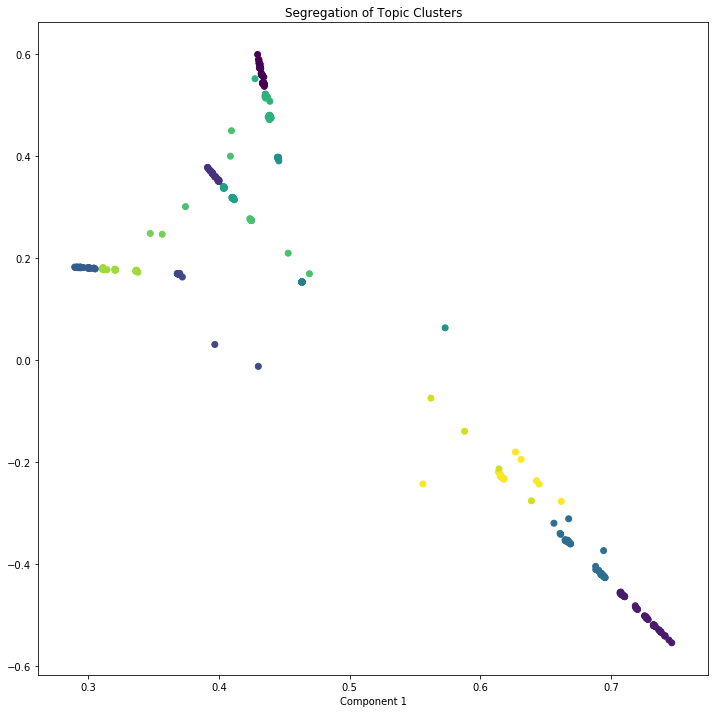

In [16]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )

In [14]:
#Separando novos documentos baseado nos pesos do LDA

new_documents = []
threshold = .8
for index, row in df_document_topic.iterrows():
    best_topic = row['dominant_topic']
    column = 'Topic'+str(int(best_topic))
    if row[column] >= threshold:
        new_documents.append(documents[int(index)])
        
print(len(new_documents))
documents = new_documents

139
